In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import glob
import pandas as pd

# Chemin du dossier contenant les fichiers XLSX
dossier_xlsx = '/home/patea/code/Pateaanania/poipoi/gtt_mensuel'

# Liste pour stocker les DataFrames
liste_dataframes = []

# Recherche des fichiers XLSX dans le dossier
fichiers_xlsx = glob.glob(os.path.join(dossier_xlsx, '*.xlsx'))

# Boucle sur tous les fichiers trouvés
for chemin_fichier in fichiers_xlsx:
    try:
        # Lecture du fichier XLSX
        df = pd.read_excel(chemin_fichier)
        
        # Forcer la conversion de la colonne 'Matricule' en chaîne de caractères si elle existe
        if 'Matricule' in df.columns:
            df['Matricule'] = df['Matricule'].astype(str)
        
        # Vérification de la présence des colonnes 'Date' et 'Début'
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
        elif 'Début' in df.columns:
            df['Date'] = pd.to_datetime(df['Début'], format='%d/%m/%Y', errors='coerce')
        else:
            print(f"Colonnes 'Date' ou 'Début' non trouvées dans le fichier : {chemin_fichier}")
            continue  # Passer au fichier suivant si aucune des colonnes n'est présente

        # Ajouter les colonnes 'Année' et 'Semaine' basées sur la colonne 'Date'
        df['Année'] = df['Date'].dt.year  # Extraire l'année
        df['Semaine'] = df['Date'].dt.isocalendar().week  # Extraire la semaine ISO

        # Ajouter le DataFrame à la liste
        liste_dataframes.append(df)
        
    except Exception as e:
        # En cas d'erreur, afficher le fichier problématique et l'erreur
        print(f"Erreur lors du traitement du fichier {chemin_fichier}: {e}")

# Concaténation de tous les DataFrames
df_concatene = pd.concat(liste_dataframes, ignore_index=True)

# Convertir les colonnes 'Début' et 'Fin' en datetime avec gestion des erreurs
for col in ['Début', 'Fin']:
    if col in df_concatene.columns:
        df_concatene[col] = pd.to_datetime(df_concatene[col], format='%d/%m/%Y', errors='coerce')

# Afficher un aperçu des premières lignes (optionnel)
print(df_concatene.head())

# Enregistrer le résultat dans un fichier Parquet
try:
    df_concatene.to_parquet('/home/patea/code/Pateaanania/poipoi/gtt/gtt212223.parquet', index=False)
    print("Données concaténées et enregistrées dans le fichier Parquet.")
except Exception as e:
    print(f"Erreur lors de l'enregistrement en Parquet : {e}")


                                           Structure  \
0  Groupement Hospitalier de la PF\Hôpital du Taa...   
1  Groupement Hospitalier de la PF\Hôpital du Taa...   
2  Groupement Hospitalier de la PF\Hôpital du Taa...   
3  Groupement Hospitalier de la PF\Hôpital du Taa...   
4  Groupement Hospitalier de la PF\Hôpital du Taa...   

                     Salarié Matricule        Qualification Code  \
0  COLOMBANI CILINKA POEHINA  20200535           SECRETAIRE  HSP   
1  COLOMBANI CILINKA POEHINA  20200535           SECRETAIRE  HSP   
2       ZISOU DANY, RAIFETIA  20100344  AUXILIAIRE DE SOINS  HSP   
3       ZISOU DANY, RAIFETIA  20100344  AUXILIAIRE DE SOINS  HSP   
4       ZISOU DANY, RAIFETIA  20100344  AUXILIAIRE DE SOINS  HSP   

                        Intitulé      Début        Fin  Heure(s)  Quantité  \
0  HEURES SUPPLEMENTAIRES PAYEES 2020-12-17 2020-12-17       1.5         0   
1  HEURES SUPPLEMENTAIRES PAYEES 2020-12-30 2020-12-30       1.0         0   
2  HEURES SUPPLEMENT

In [10]:
# Résumé statistique des colonnes numériques
df_concatene.describe()


,Heure(s),Quantité,Jour(s),Description,Année,Semaine
count,131334.00000,131334.0,131334.000000,0.0,131334.000000,131334.000000
mean,17.47522,0.0,2.921536,NaN,2021.473259,26.847930
std,32.41776,0.0,5.695152,NaN,1.125809,15.258622
min,0.00000,0.0,0.000000,NaN,2020.000000,1.000000
25%,1.00000,0.0,0.000000,NaN,2020.000000,13.000000
50%,4.00000,0.0,1.000000,NaN,2021.000000,26.000000
75%,16.00000,0.0,3.000000,NaN,2022.000000,40.000000
max,264.00000,0.0,31.000000,NaN,2023.000000,53.000000


In [11]:
df_concatene.drop(columns=['Quantité'], inplace=True)


In [13]:
df_concatene['Description'] = df_concatene['Description'].fillna('Aucune description')


In [14]:
valeurs_hautes = df_concatene[df_concatene['Heure(s)'] > 100]
print(valeurs_hautes)


                                                Structure  \
30      Groupement Hospitalier de la PF\Hôpital du Taa...   
36      Groupement Hospitalier de la PF\Hôpital du Taa...   
37      Groupement Hospitalier de la PF\Hôpital du Taa...   
94      Groupement Hospitalier de la PF\Hôpital du Taa...   
135     Groupement Hospitalier de la PF\Hôpital du Taa...   
...                                                   ...   
131201  Groupement Hospitalier de la PF\Hôpital du Taa...   
131206  Groupement Hospitalier de la PF\Hôpital du Taa...   
131274  Groupement Hospitalier de la PF\Hôpital du Taa...   
131291  Groupement Hospitalier de la PF\Hôpital du Taa...   
131307  Groupement Hospitalier de la PF\Hôpital du Taa...   

                            Salarié Matricule                  Qualification  \
30      MAC CARTHY WILLIAMS,HEIMANA  20100260                    BRANCARDIER   
36                     MERVIN WILLY  19890076                    BRANCARDIER   
37                   PAOFAI

In [15]:
stats_par_annee_semaine = df_concatene.groupby(['Année', 'Semaine']).agg({
    'Heure(s)': ['mean', 'sum'],
    'Jour(s)': ['mean', 'sum'],
})
print(stats_par_annee_semaine.head())


                Heure(s)             Jour(s)        
                    mean       sum      mean     sum
Année Semaine                                       
2020  1        36.494700  20656.00  6.909894  3911.0
      2        14.899123   7643.25  2.363548  1212.5
      3        12.356164   8118.00  1.984018  1303.5
      4         9.851142   6038.75  1.510604   926.0
      5        18.218678  14192.35  3.249679  2531.5


In [16]:
# Afficher les valeurs uniques dans la colonne 'Intitulé'
valeurs_intitule = df_concatene['Intitulé'].unique()

print("Valeurs uniques dans la colonne 'Intitulé' :")
print(valeurs_intitule)


Valeurs uniques dans la colonne 'Intitulé' :
['HEURES SUPPLEMENTAIRES PAYEES' 'INTERVENTION SUR ASTREINTE PAYEE'
 'HS A RECUPERER' 'MALADIE' 'ANNUEL' 'RECUPERATION'
 'FORMATION A RECUPERER' 'EXCEPTIONNEL'
 'INTERVENTION SUR ASTREINTE RECUPEREE' 'ENFANT' 'DECES FAMILIAL'
 'FORMATION' 'ALLAITEMENT' 'ANCIENNETE' 'EXCEPTIONNEL DE FORMATION'
 'Hors Saison (CEAPF)' 'ACCIDENT DU TRAVAIL' 'MATERNITE'
 'ABSENCE A JUSTIFIER' 'TOURNEE' 'MARIAGE FAMILIAL' 'PATERNEL'
 'SERVICE NON FAIT' 'ABS SYNDICALES FORMATION'
 'ABS MANDAT MUNICIPAL (Article L2123-1)' 'MARIAGE'
 'Activ. Jeunesse & Sports' 'DELAI DE ROUTE ' 'TRAINING BREAK' 'BAPTEME'
 'GREVE' 'ADOPTION' 'QUATORZAINE COVID 19' 'ADMINISTRATIF' 'AEA - COVID'
 'MISSION' 'GREVE-ABSENCE A JUSTIFIER' 'DECES DU CONJOINT' 'DECES ENFANT'
 'FORMATION Non Récupérée / Non Rémunérée'
 'Réunion des Organismes Consultatifs à récupérer']


In [19]:
# Analyse des heures et jours par type d'événement ('Intitulé') et par année
resultats_par_annee_intitule = df_concatene.groupby(['Année', 'Intitulé']).agg({
    'Heure(s)': ['mean', 'sum', 'min', 'max'],
    'Jour(s)': ['mean', 'sum', 'min', 'max'],
    'Intitulé': 'count'  # Nombre d'occurrences par 'Année' et 'Intitulé'
})

# Renommer les colonnes pour plus de clarté
resultats_par_annee_intitule.columns = ['Heure Moyenne', 'Total Heures', 'Heure Min', 'Heure Max',
                                        'Jour Moyen', 'Total Jours', 'Jour Min', 'Jour Max',
                                        'Nombre d’occurrences']

# Trier les résultats par année et total des heures pour identifier les événements les plus importants
resultats_par_annee_intitule = resultats_par_annee_intitule.sort_values(by=['Année', 'Total Heures'], ascending=[True, False])

# Afficher les résultats pour inspection
print(resultats_par_annee_intitule.head(30))  # Afficher les 30 premiers résultats


                                               Heure Moyenne  Total Heures  \
Année Intitulé                                                               
2020  ANNUEL                                       35.870659     261317.75   
      MALADIE                                      52.537265     153671.50   
      MATERNITE                                   129.076923      20136.00   
      RECUPERATION                                  4.270326      18067.75   
      EXCEPTIONNEL                                  8.029755      13763.00   
      HS A RECUPERER                                1.390654      10589.83   
      ANCIENNETE                                   23.547191      10478.50   
      ACCIDENT DU TRAVAIL                          93.360000       9336.00   
      HEURES SUPPLEMENTAIRES PAYEES                 1.944926       7375.16   
      ENFANT                                       13.704376       7359.25   
      INTERVENTION SUR ASTREINTE PAYEE              3.822305    

In [20]:
pip install seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


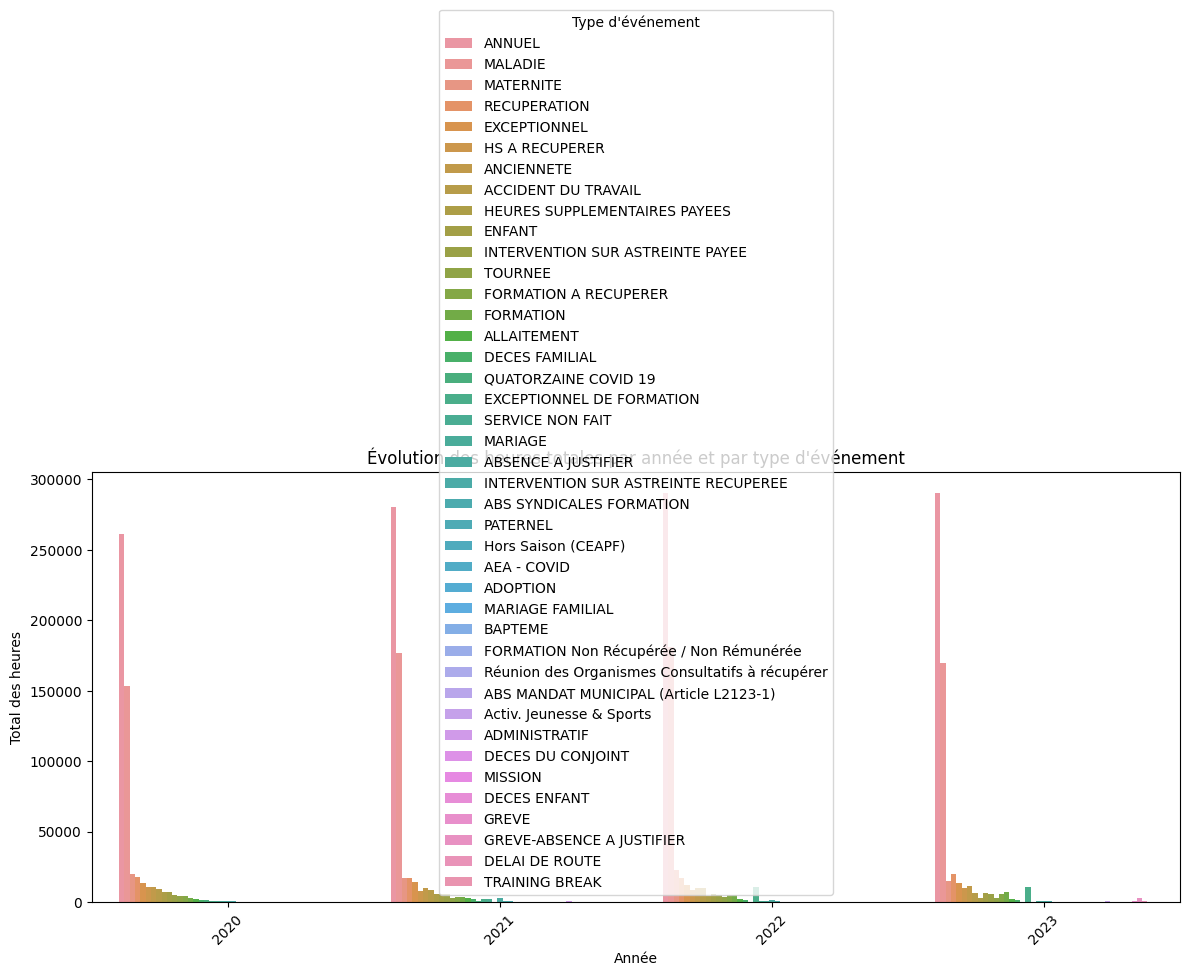

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Réinitialiser l'index pour que 'Année' et 'Intitulé' deviennent des colonnes
resultats_par_annee_intitule_reset = resultats_par_annee_intitule.reset_index()

# Visualisation : barres empilées des heures par année et par type d'événement
plt.figure(figsize=(12, 8))
sns.barplot(x='Année', y='Total Heures', hue='Intitulé', data=resultats_par_annee_intitule_reset, estimator=sum)

plt.title('Évolution des heures totales par année et par type d\'événement')
plt.ylabel('Total des heures')
plt.xlabel('Année')
plt.xticks(rotation=45)  # Tourner les étiquettes des années pour plus de lisibilité
plt.legend(title='Type d\'événement')
plt.tight_layout()
plt.show()


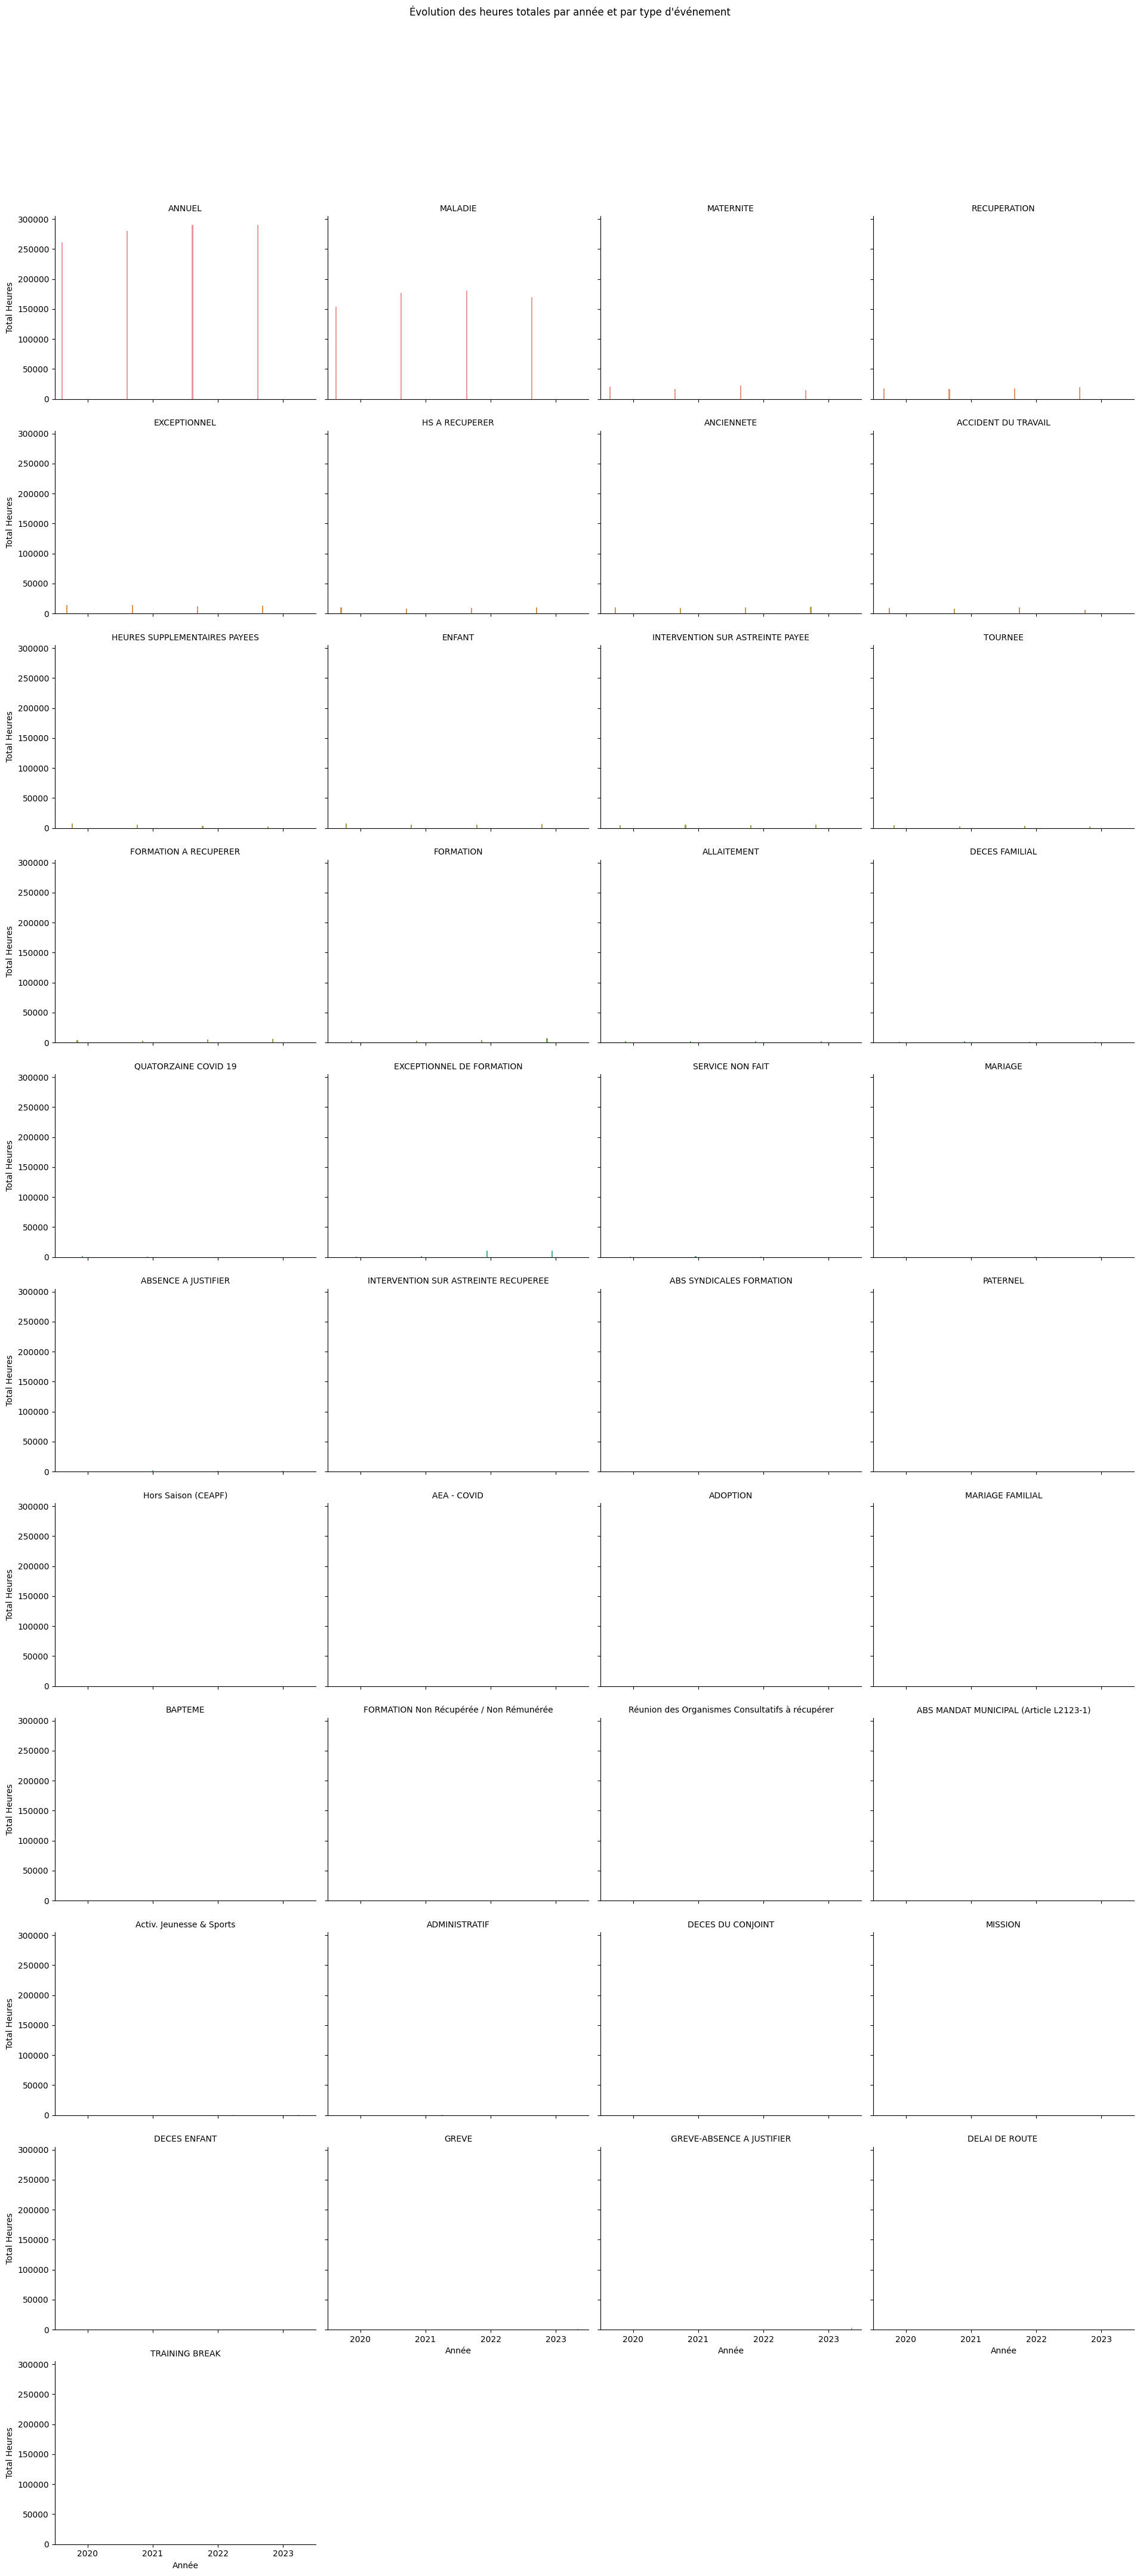

In [22]:
# Créer des sous-graphes pour chaque type d'événement
g = sns.catplot(x='Année', y='Total Heures', hue='Intitulé', data=resultats_par_annee_intitule_reset, kind='bar', col='Intitulé', col_wrap=4, height=4, aspect=1.2)

g.set_titles("{col_name}")  # Affiche le titre de chaque subplot
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Évolution des heures totales par année et par type d'événement")  # Titre principal
plt.show()


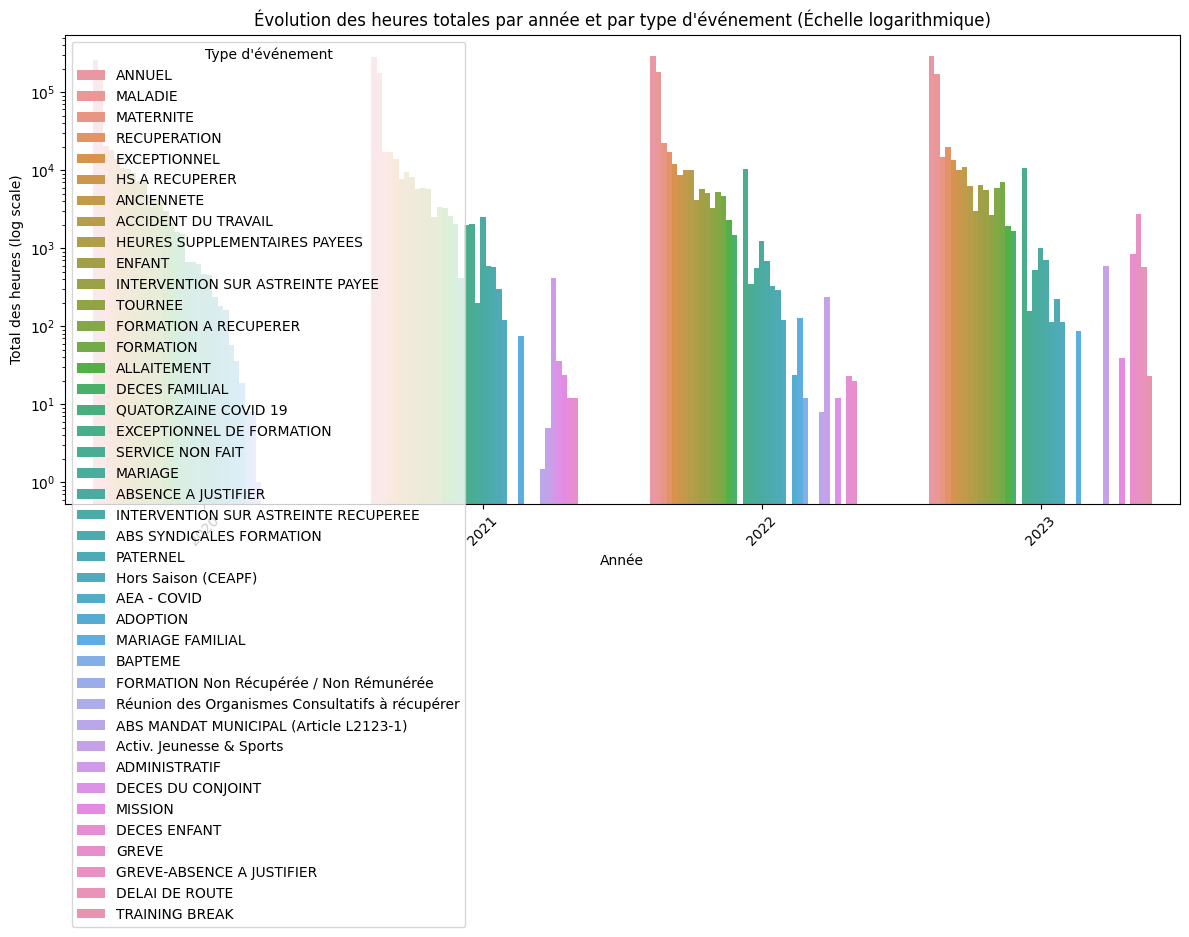

In [23]:
# Visualisation avec échelle logarithmique
plt.figure(figsize=(12, 8))
sns.barplot(x='Année', y='Total Heures', hue='Intitulé', data=resultats_par_annee_intitule_reset, estimator=sum)

plt.yscale('log')  # Utiliser une échelle logarithmique pour mieux représenter les extrêmes
plt.title('Évolution des heures totales par année et par type d\'événement (Échelle logarithmique)')
plt.ylabel('Total des heures (log scale)')
plt.xlabel('Année')
plt.xticks(rotation=45)
plt.legend(title='Type d\'événement')
plt.tight_layout()
plt.show()


In [25]:
print(df_concatene.columns)


Index(['Structure', 'Salarié', 'Matricule', 'Qualification', 'Code',
       'Intitulé', 'Début', 'Fin', 'Heure(s)', 'Jour(s)', 'Plan',
       'Description', 'Date', 'Année', 'Semaine'],
      dtype='object')


In [26]:
import pandas as pd

# Agréger les données pour obtenir les totaux par année et par type d'événement
resultats_par_annee_intitule = df_concatene.groupby(['Année', 'Intitulé']).agg({
    'Heure(s)': 'sum',
    'Jour(s)': 'sum'  # Si vous avez également besoin de totaliser les jours
}).reset_index()

# Renommer les colonnes pour plus de clarté
resultats_par_annee_intitule = resultats_par_annee_intitule.rename(columns={
    'Heure(s)': 'Total Heures',
    'Jour(s)': 'Total Jours'
})

print(resultats_par_annee_intitule.head())


   Année                                Intitulé  Total Heures  Total Jours
0   2020  ABS MANDAT MUNICIPAL (Article L2123-1)           0.0          2.0
1   2020                ABS SYNDICALES FORMATION         237.0         30.0
2   2020                     ABSENCE A JUSTIFIER         463.0        103.0
3   2020                     ACCIDENT DU TRAVAIL        9336.0       1573.0
4   2020                                ADOPTION          36.0          3.0


In [27]:
# Calcul de la variation en pourcentage d'une année à l'autre pour chaque 'Intitulé'
resultats_par_annee_intitule['Variation (%)'] = resultats_par_annee_intitule.groupby('Intitulé')['Total Heures'].pct_change() * 100

# Afficher les premières lignes pour vérifier
print(resultats_par_annee_intitule.head(10))


   Année                                Intitulé  Total Heures  Total Jours  \
0   2020  ABS MANDAT MUNICIPAL (Article L2123-1)          0.00          2.0   
1   2020                ABS SYNDICALES FORMATION        237.00         30.0   
2   2020                     ABSENCE A JUSTIFIER        463.00        103.0   
3   2020                     ACCIDENT DU TRAVAIL       9336.00       1573.0   
4   2020                                ADOPTION         36.00          3.0   
5   2020                             AEA - COVID         58.00         10.0   
6   2020                             ALLAITEMENT       2122.50          0.0   
7   2020                              ANCIENNETE      10478.50       1687.5   
8   2020                                  ANNUEL     261317.75      46660.0   
9   2020                Activ. Jeunesse & Sports          0.00          7.0   

   Variation (%)  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
5            NaN

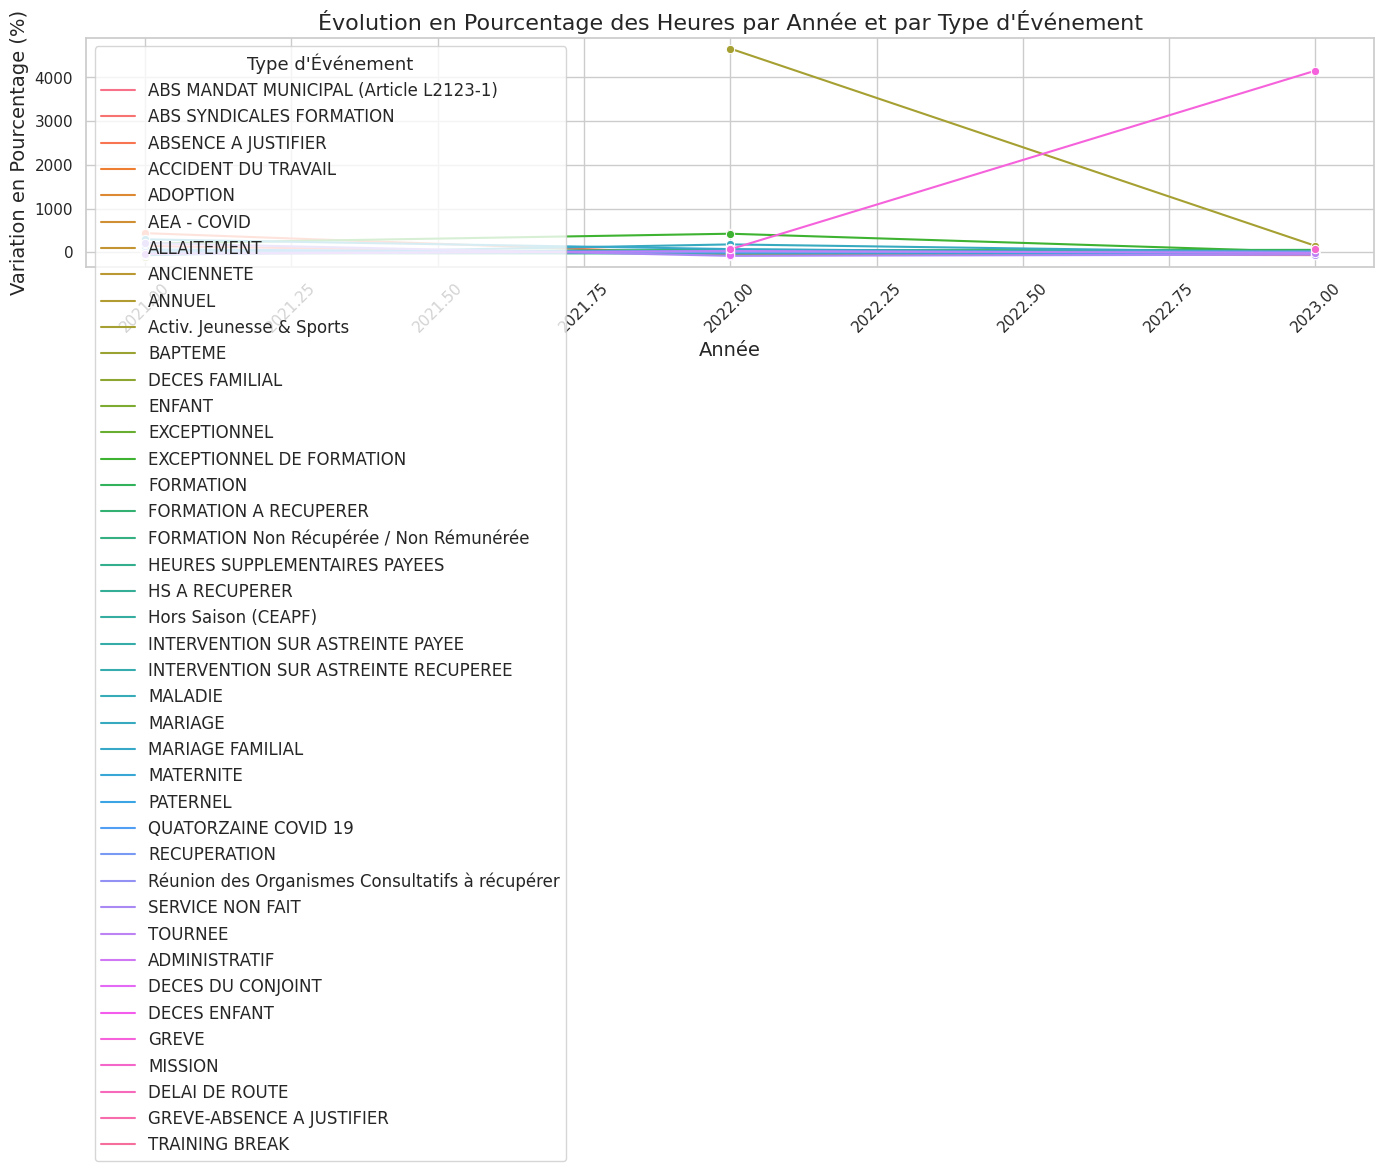

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style de Seaborn
sns.set(style="whitegrid")

# Créer le graphique
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=resultats_par_annee_intitule,
    x='Année',
    y='Variation (%)',
    hue='Intitulé',
    marker='o'
)

plt.title('Évolution en Pourcentage des Heures par Année et par Type d\'Événement', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Variation en Pourcentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Type d\'Événement', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


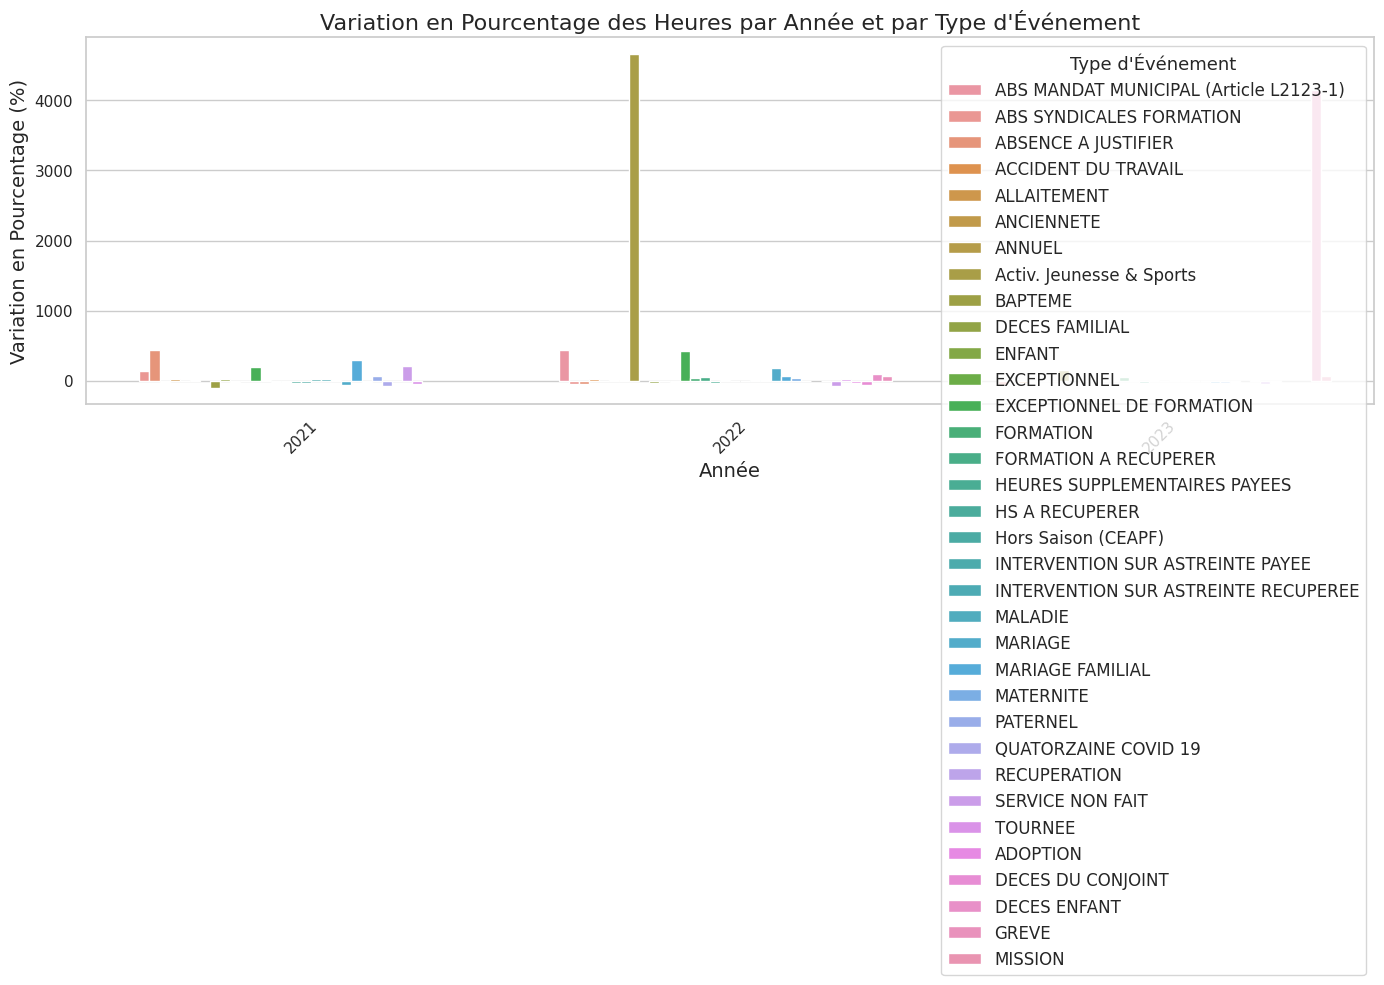

In [29]:
# Filtrer les variations non nulles (car la première année n'a pas de variation)
df_variation = resultats_par_annee_intitule.dropna(subset=['Variation (%)'])

plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_variation,
    x='Année',
    y='Variation (%)',
    hue='Intitulé'
)

plt.title('Variation en Pourcentage des Heures par Année et par Type d\'Événement', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Variation en Pourcentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Type d\'Événement', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


In [31]:
# Supprimer les variations supérieures à 200% ou inférieures à -200%
df_variation_filtered = resultats_par_annee_intitule[
    (resultats_par_annee_intitule['Variation (%)'] <= 200) &
    (resultats_par_annee_intitule['Variation (%)'] >= -200)
].dropna(subset=['Variation (%)'])


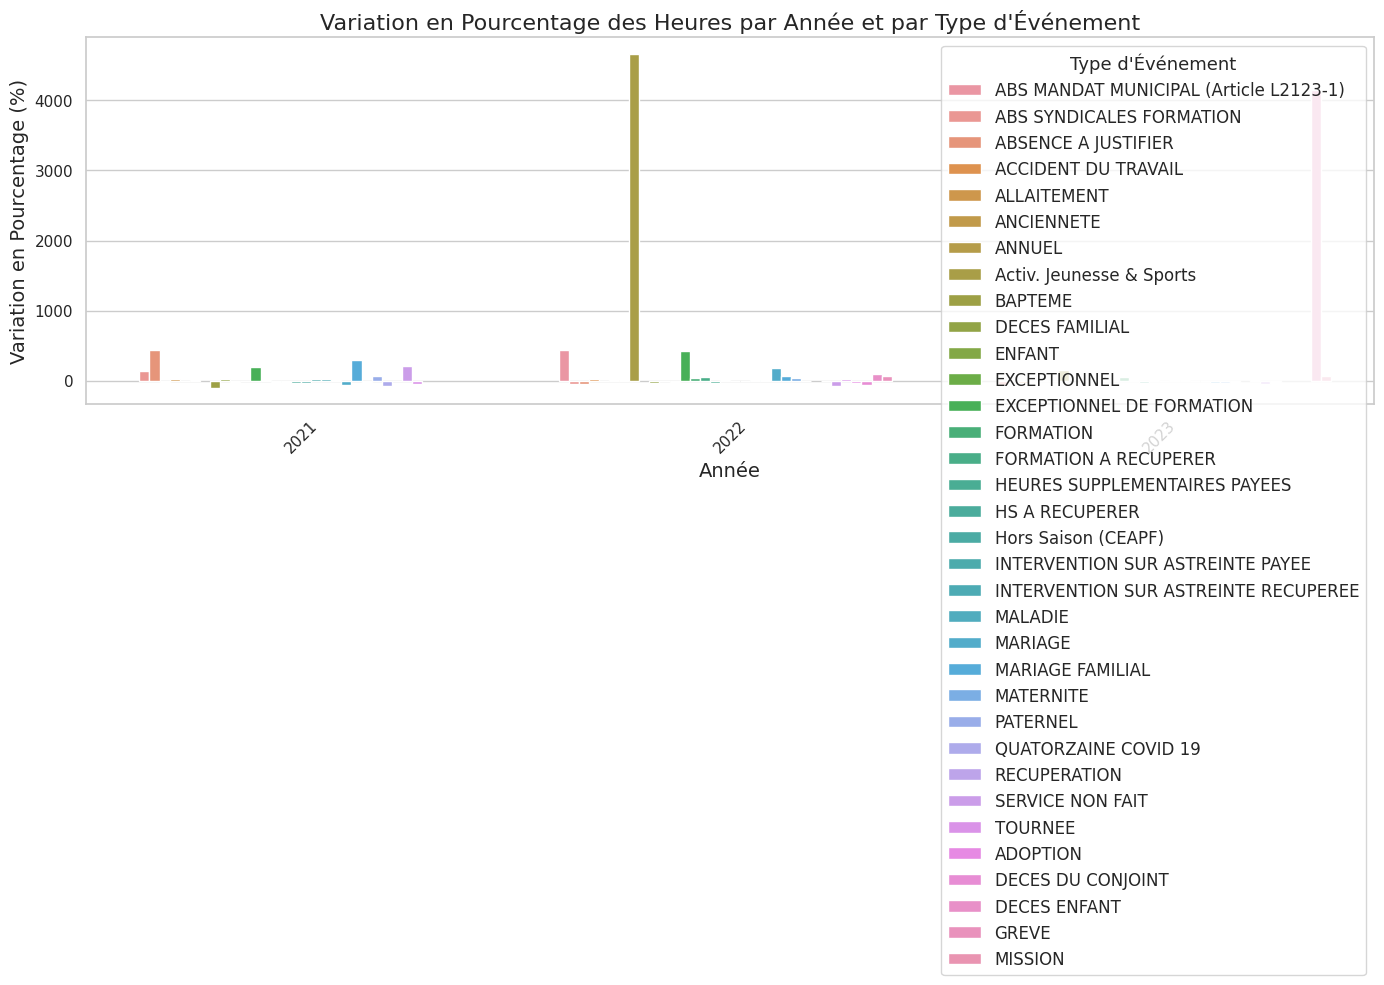

In [32]:
# Filtrer les variations non nulles (car la première année n'a pas de variation)
df_variation = resultats_par_annee_intitule.dropna(subset=['Variation (%)'])

plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_variation,
    x='Année',
    y='Variation (%)',
    hue='Intitulé'
)

plt.title('Variation en Pourcentage des Heures par Année et par Type d\'Événement', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Variation en Pourcentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Type d\'Événement', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


   Année   Heure(s)  Variation (%)
0   2020  153671.50            NaN
1   2021  177065.25      15.223220
2   2022  181216.75       2.344616
3   2023  169397.50      -6.522162


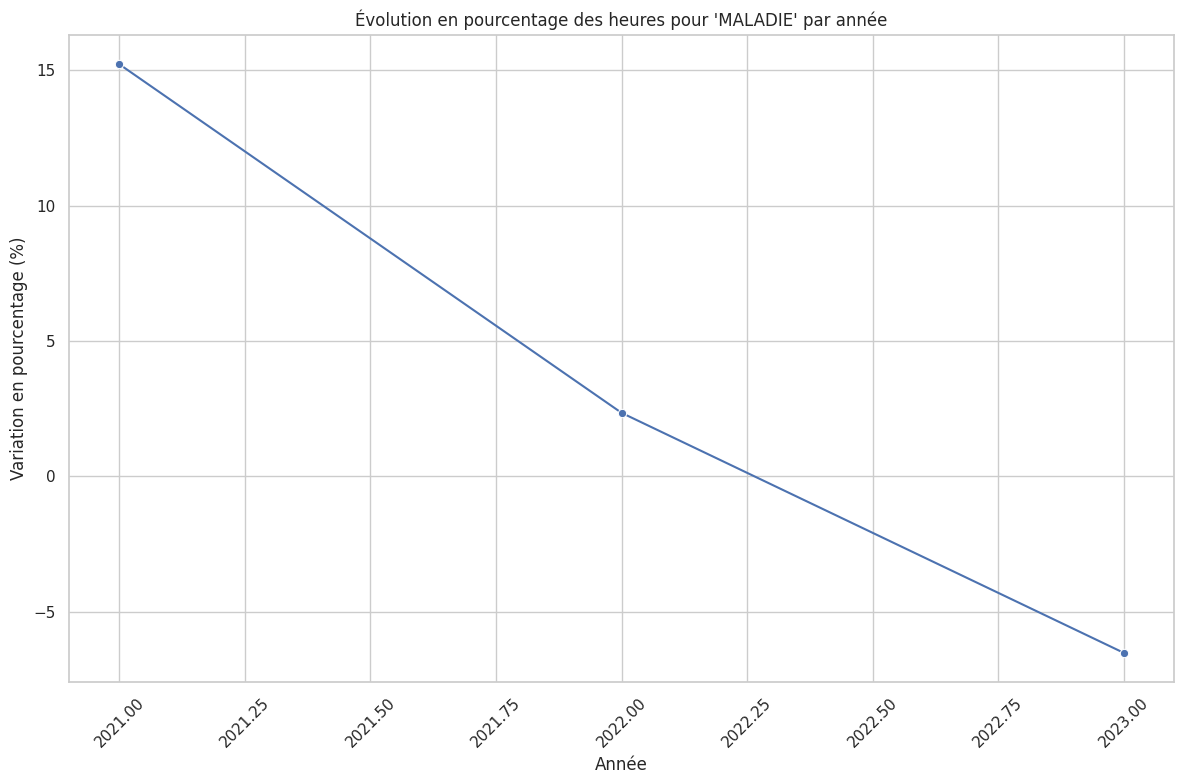

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer pour ne garder que les lignes où 'Intitulé' est 'MALADIE'
df_maladie = df_concatene[df_concatene['Intitulé'] == 'MALADIE']

# Regrouper par 'Année' et calculer la somme des heures pour chaque année
resultats_maladie = df_maladie.groupby('Année').agg({'Heure(s)': 'sum'}).reset_index()

# Calcul de la variation en pourcentage d'une année à l'autre
resultats_maladie['Variation (%)'] = resultats_maladie['Heure(s)'].pct_change() * 100

# Affichage des résultats
print(resultats_maladie)

# Visualisation de l'évolution des heures et de la variation en pourcentage
plt.figure(figsize=(12, 8))
sns.lineplot(x='Année', y='Variation (%)', data=resultats_maladie, marker='o')

plt.title("Évolution en pourcentage des heures pour 'MALADIE' par année")
plt.ylabel('Variation en pourcentage (%)')
plt.xlabel('Année')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour ne garder que l'intitulé 'MALADIE'
df_maladie = df_concatene[df_concatene['Intitulé'] == 'MALADIE']

# Extraire l'information de trimestre depuis les dates 'Début' et créer une colonne 'Trimestre'
df_maladie['Trimestre'] = df_maladie['Début'].dt.to_period('Q')

# Regrouper par 'Année' et 'Trimestre' et calculer la somme des heures pour chaque période
resultats_maladie_trimestriel = df_maladie.groupby('Trimestre').agg({'Heure(s)': 'sum'}).reset_index()

# Affichage des données calculées pour inspection
print(resultats_maladie_trimestriel.head())


  Trimestre  Heure(s)
0    2020Q1  33768.75
1    2020Q2  26919.25
2    2020Q3  36033.00
3    2020Q4  56950.50
4    2021Q1  38668.00


/tmp/ipykernel_26632/2073851242.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maladie['Trimestre'] = df_maladie['Début'].dt.to_period('Q')


In [35]:
# Calculer une moyenne glissante sur 4 trimestres (pour lisser sur un an)
resultats_maladie_trimestriel['Moyenne Glissante'] = resultats_maladie_trimestriel['Heure(s)'].rolling(window=4).mean()

# Affichage des résultats
print(resultats_maladie_trimestriel.head(10))


  Trimestre  Heure(s)  Moyenne Glissante
0    2020Q1  33768.75                NaN
1    2020Q2  26919.25                NaN
2    2020Q3  36033.00                NaN
3    2020Q4  56950.50         38417.8750
4    2021Q1  38668.00         39642.6875
5    2021Q2  40999.00         43162.6250
6    2021Q3  58472.75         48772.5625
7    2021Q4  38925.50         44266.3125
8    2022Q1  54820.75         48304.5000
9    2022Q2  42031.25         48562.5625


/tmp/ipykernel_26632/727172402.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maladie['Trimestre'] = df_maladie['Début'].dt.to_period('Q')


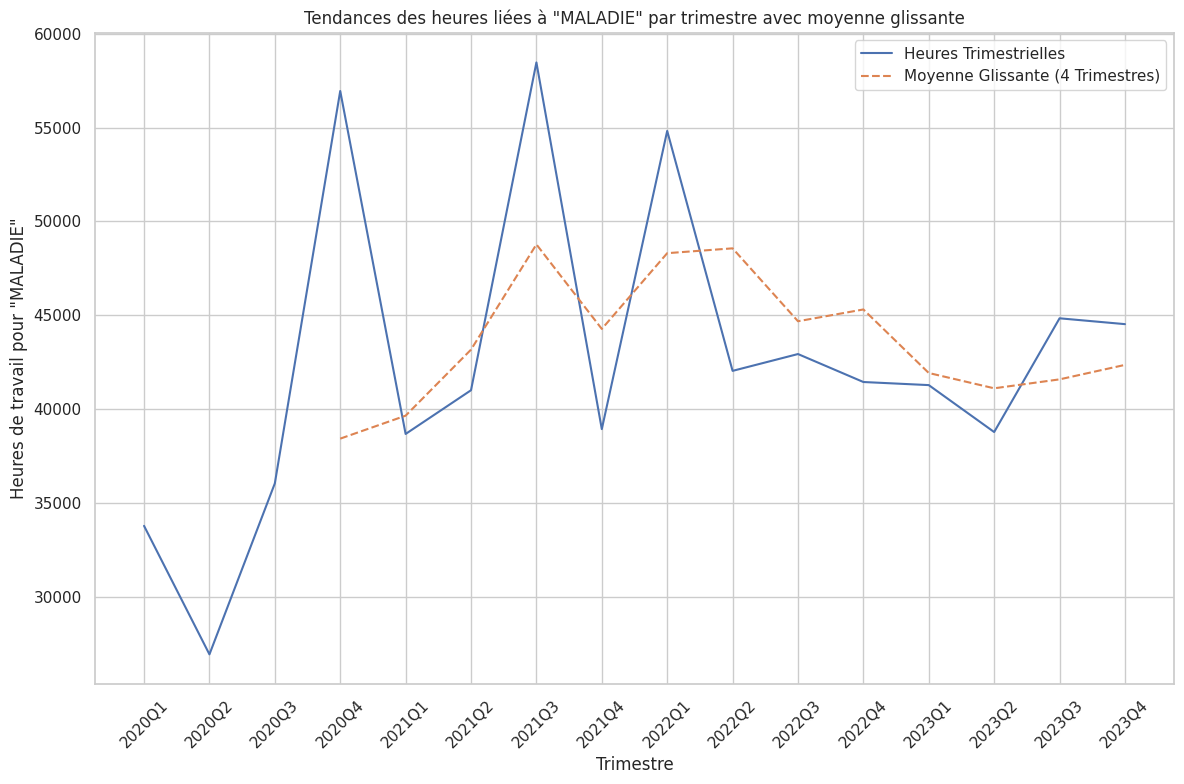

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour ne garder que l'intitulé 'MALADIE'
df_maladie = df_concatene[df_concatene['Intitulé'] == 'MALADIE']

# Extraire l'information de trimestre depuis les dates 'Début' et créer une colonne 'Trimestre'
df_maladie['Trimestre'] = df_maladie['Début'].dt.to_period('Q')

# Regrouper par 'Année' et 'Trimestre' et calculer la somme des heures pour chaque période
resultats_maladie_trimestriel = df_maladie.groupby('Trimestre').agg({'Heure(s)': 'sum'}).reset_index()

# Conversion de la colonne 'Trimestre' en chaîne de caractères pour Seaborn
resultats_maladie_trimestriel['Trimestre'] = resultats_maladie_trimestriel['Trimestre'].astype(str)

# Calculer une moyenne glissante sur 4 trimestres (pour lisser sur un an)
resultats_maladie_trimestriel['Moyenne Glissante'] = resultats_maladie_trimestriel['Heure(s)'].rolling(window=4).mean()

# Visualisation de l'évolution trimestrielle des heures liées à 'MALADIE'
plt.figure(figsize=(12, 8))

# Tracé des heures trimestrielles
sns.lineplot(x='Trimestre', y='Heure(s)', data=resultats_maladie_trimestriel, label='Heures Trimestrielles')

# Tracé de la moyenne glissante
sns.lineplot(x='Trimestre', y='Moyenne Glissante', data=resultats_maladie_trimestriel, label='Moyenne Glissante (4 Trimestres)', linestyle='--')

plt.title('Tendances des heures liées à "MALADIE" par trimestre avec moyenne glissante')
plt.ylabel('Heures de travail pour "MALADIE"')
plt.xlabel('Trimestre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


In [38]:
import pandas as pd

# Filtrer les données pour ne garder que les arrêts maladie
df_maladie = df_concatene[df_concatene['Intitulé'] == 'MALADIE']

# Calculer la durée de chaque arrêt en jours
df_maladie['Durée'] = (df_maladie['Fin'] - df_maladie['Début']).dt.days + 1

# Définir les arrêts de longue durée (par exemple, durée > 30 jours)
seuil_longue_duree = 21
df_maladie_longue_duree = df_maladie[df_maladie['Durée'] > seuil_longue_duree]
df_maladie_courte_duree = df_maladie[df_maladie['Durée'] <= seuil_longue_duree]

# Afficher un résumé des données pour les arrêts de longue et courte durée
print("Arrêts de longue durée (supérieurs à 30 jours) :")
print(df_maladie_longue_duree[['Matricule', 'Début', 'Fin', 'Durée']].head())

print("\nArrêts de courte durée (inférieurs ou égaux à 30 jours) :")
print(df_maladie_courte_duree[['Matricule', 'Début', 'Fin', 'Durée']].head())

# Vous pouvez aussi analyser les deux types d'arrêts séparément, par exemple, avec une analyse annuelle
resultats_maladie_longue = df_maladie_longue_duree.groupby('Année').agg({
    'Heure(s)': 'sum',
    'Matricule': 'nunique'
}).rename(columns={'Heure(s)': 'Total Heures Longue Durée', 'Matricule': 'Nombre de personnes'})

resultats_maladie_courte = df_maladie_courte_duree.groupby('Année').agg({
    'Heure(s)': 'sum',
    'Matricule': 'nunique'
}).rename(columns={'Heure(s)': 'Total Heures Courte Durée', 'Matricule': 'Nombre de personnes'})

# Afficher les résultats
print("\nRésultats pour les arrêts de longue durée par année :")
print(resultats_maladie_longue)

print("\nRésultats pour les arrêts de courte durée par année :")
print(resultats_maladie_courte)


Arrêts de longue durée (supérieurs à 30 jours) :
    Matricule      Début        Fin  Durée
36   19890076 2020-12-01 2020-12-31     31
94   19930044 2020-12-01 2020-12-31     31
135  19900134 2020-12-01 2020-12-31     31
204  20190005 2020-12-01 2020-12-31     31
229  19940052 2020-12-01 2020-12-31     31

Arrêts de courte durée (inférieurs ou égaux à 30 jours) :
   Matricule      Début        Fin  Durée
15  20200509 2020-12-12 2020-12-17      6
21  20200498 2020-12-12 2020-12-18      7
24  20200526 2020-12-12 2020-12-14      3
26  20200529 2020-12-10 2020-12-21     12
35  20100233 2020-12-01 2020-12-09      9

Résultats pour les arrêts de longue durée par année :
       Total Heures Longue Durée  Nombre de personnes
Année                                                
2020                    59328.25                  172
2021                    81138.00                  177
2022                    81630.00                  186
2023                    87406.00                  198

Ré

/tmp/ipykernel_26632/3173719105.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maladie['Durée'] = (df_maladie['Fin'] - df_maladie['Début']).dt.days + 1


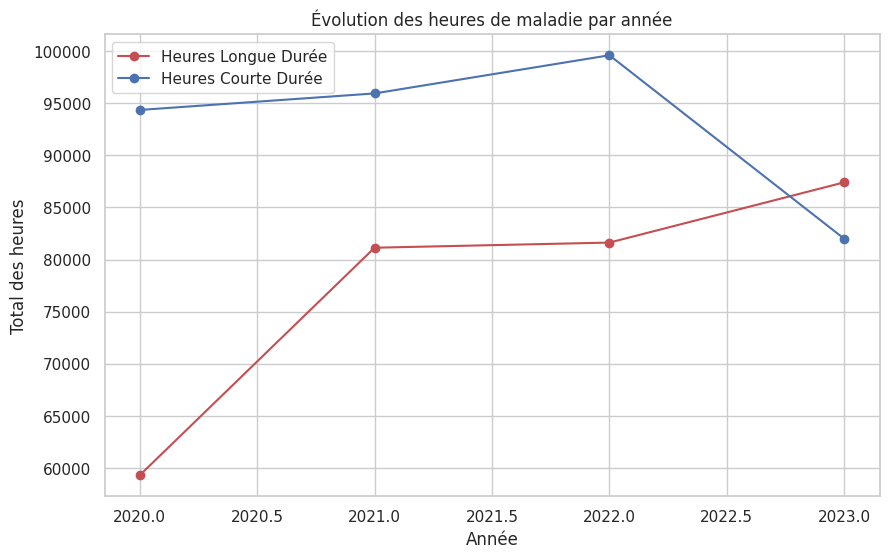

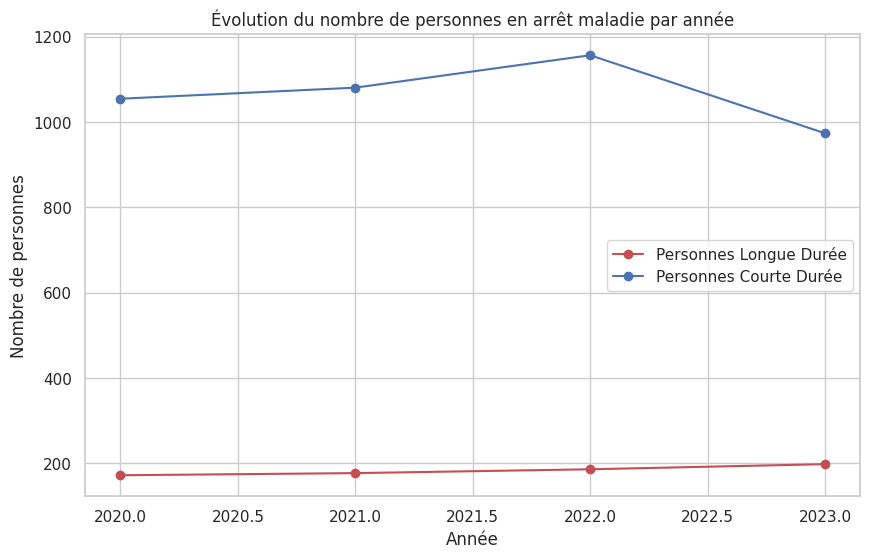

In [39]:
import matplotlib.pyplot as plt

# Visualisation des heures totales par année pour les arrêts de longue et courte durée
plt.figure(figsize=(10, 6))
plt.plot(resultats_maladie_longue.index, resultats_maladie_longue['Total Heures Longue Durée'], marker='o', label='Heures Longue Durée', color='r')
plt.plot(resultats_maladie_courte.index, resultats_maladie_courte['Total Heures Courte Durée'], marker='o', label='Heures Courte Durée', color='b')

# Ajouter des titres et légendes
plt.title('Évolution des heures de maladie par année')
plt.xlabel('Année')
plt.ylabel('Total des heures')
plt.legend()
plt.grid(True)
plt.show()

# Visualisation du nombre de personnes concernées par les arrêts de longue et courte durée
plt.figure(figsize=(10, 6))
plt.plot(resultats_maladie_longue.index, resultats_maladie_longue['Nombre de personnes'], marker='o', label='Personnes Longue Durée', color='r')
plt.plot(resultats_maladie_courte.index, resultats_maladie_courte['Nombre de personnes'], marker='o', label='Personnes Courte Durée', color='b')

# Ajouter des titres et légendes
plt.title('Évolution du nombre de personnes en arrêt maladie par année')
plt.xlabel('Année')
plt.ylabel('Nombre de personnes')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
import pandas as pd

# Conversion des colonnes 'Début' et 'Fin' en format datetime
df_concatene['Début'] = pd.to_datetime(df_concatene['Début'])
df_concatene['Fin'] = pd.to_datetime(df_concatene['Fin'])

# Calculer la durée de chaque arrêt de maladie en jours
df_concatene['Durée'] = (df_concatene['Fin'] - df_concatene['Début']).dt.days + 1  # Inclure le jour de début

# Créer des catégories pour la durée des arrêts
conditions = [
    (df_concatene['Durée'] <= 7),
    (df_concatene['Durée'] > 7) & (df_concatene['Durée'] <= 21),
    (df_concatene['Durée'] > 21) & (df_concatene['Durée'] <= 90),
    (df_concatene['Durée'] > 90) & (df_concatene['Durée'] <= 180),
    (df_concatene['Durée'] > 180) & (df_concatene['Durée'] <= 270),
    (df_concatene['Durée'] > 270)
]

categories = ['Moins de 7 jours', 'Entre 7 et 21 jours', 'Entre 21 jours et 3 mois',
              'Entre 3 et 6 mois', 'Entre 6 et 9 mois', 'Plus de 9 mois']

df_concatene['Catégorie Durée'] = pd.cut(df_concatene['Durée'], bins=[0, 7, 21, 90, 180, 270, float('inf')], labels=categories)

# Filtrer les arrêts de maladie
df_maladie = df_concatene[df_concatene['Intitulé'] == 'MALADIE']

# Regrouper par catégorie de durée et année pour obtenir des statistiques
resultats_par_categorie = df_maladie.groupby(['Année', 'Catégorie Durée']).agg({
    'Heure(s)': ['sum', 'mean'],        # Total et moyenne des heures
    'Matricule': 'nunique',             # Nombre de personnes concernées
    'Durée': ['sum', 'mean', 'max']     # Statistiques sur la durée
}).reset_index()

# Renommer les colonnes pour plus de clarté
resultats_par_categorie.columns = ['Année', 'Catégorie Durée', 'Total Heures', 'Heures Moyennes', 'Nombre de Personnes',
                                   'Total Durée', 'Durée Moyenne', 'Durée Max']

# Afficher les résultats
print(resultats_par_categorie)


    Année           Catégorie Durée  Total Heures  Heures Moyennes  \
0    2020          Moins de 7 jours      43911.75        23.904056   
1    2020       Entre 7 et 21 jours      50431.50        69.849723   
2    2020  Entre 21 jours et 3 mois      59328.25       162.099044   
3    2020         Entre 3 et 6 mois          0.00              NaN   
4    2020         Entre 6 et 9 mois          0.00              NaN   
5    2020            Plus de 9 mois          0.00              NaN   
6    2021          Moins de 7 jours      41387.00        23.251124   
7    2021       Entre 7 et 21 jours      54540.25        70.923602   
8    2021  Entre 21 jours et 3 mois      81138.00       165.926380   
9    2021         Entre 3 et 6 mois          0.00              NaN   
10   2021         Entre 6 et 9 mois          0.00              NaN   
11   2021            Plus de 9 mois          0.00              NaN   
12   2022          Moins de 7 jours      53438.00        24.762743   
13   2022       Entr

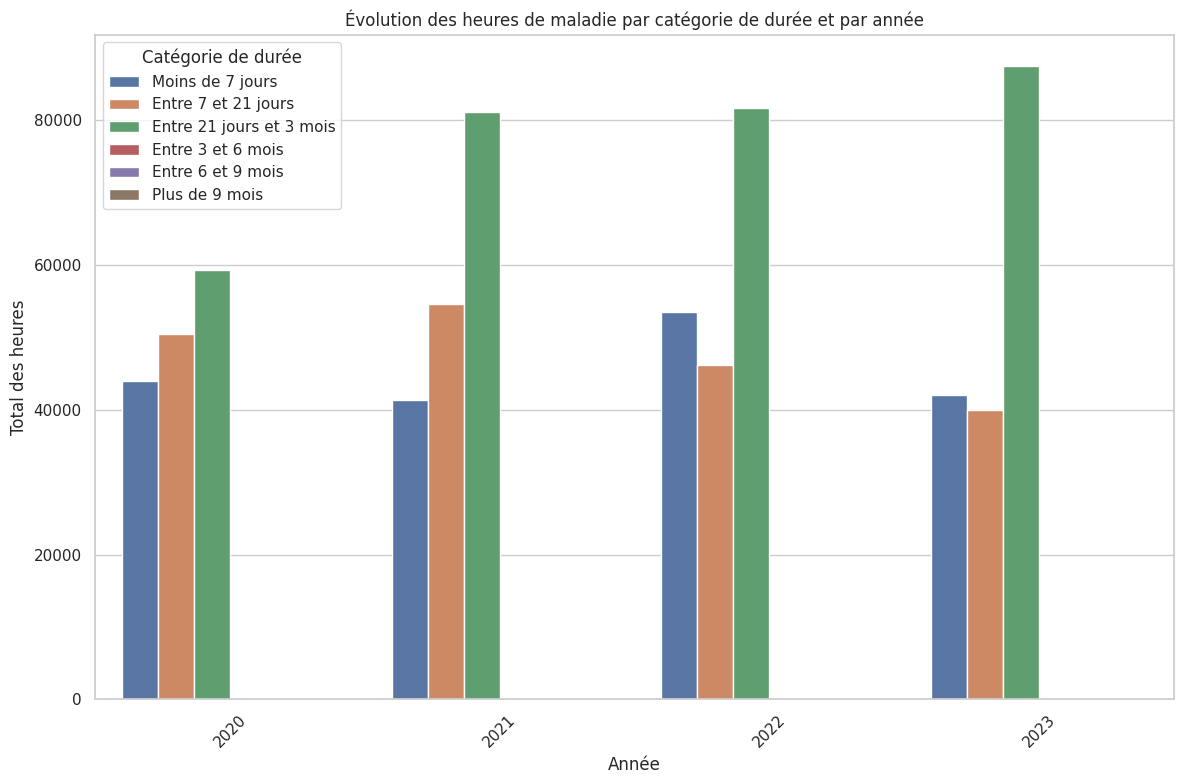

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation : barres empilées des heures totales par catégorie de durée et par année
plt.figure(figsize=(12, 8))
sns.barplot(x='Année', y='Total Heures', hue='Catégorie Durée', data=resultats_par_categorie, estimator=sum)

plt.title('Évolution des heures de maladie par catégorie de durée et par année')
plt.ylabel('Total des heures')
plt.xlabel('Année')
plt.xticks(rotation=45)
plt.legend(title='Catégorie de durée')
plt.tight_layout()
plt.show()


In [42]:
# Filtrer les données pour les heures supplémentaires
heures_supp_data = df_concatene[df_concatene['Intitulé'].isin(['HS A RECUPERER', 'HEURES SUPPLEMENTAIRES PAYEES'])]


In [43]:
# Calcul des heures supplémentaires totales par année et type d'heure supplémentaire
resultats_heures_supp = heures_supp_data.groupby(['Année', 'Intitulé']).agg({
    'Heure(s)': ['sum', 'mean', 'min', 'max'],
    'Matricule': 'count'
}).reset_index()

# Renommer les colonnes pour plus de clarté
resultats_heures_supp.columns = ['Année', 'Intitulé', 'Total Heures', 'Heures Moyennes', 'Heures Min', 'Heures Max', 'Nombre de Personnes']

# Afficher les résultats pour inspection
print(resultats_heures_supp.head(10))


   Année                       Intitulé  Total Heures  Heures Moyennes  \
0   2020  HEURES SUPPLEMENTAIRES PAYEES       7375.16         1.944926   
1   2020                 HS A RECUPERER      10589.83         1.390654   
2   2021  HEURES SUPPLEMENTAIRES PAYEES       5735.75         1.870150   
3   2021                 HS A RECUPERER       7709.96         1.323598   
4   2022  HEURES SUPPLEMENTAIRES PAYEES       4101.75         2.051901   
5   2022                 HS A RECUPERER       8704.97         1.510755   
6   2023  HEURES SUPPLEMENTAIRES PAYEES       2959.46         1.733720   
7   2023                 HS A RECUPERER      10046.10         1.602249   

   Heures Min  Heures Max  Nombre de Personnes  
0        0.00        26.0                 3792  
1        0.00        40.0                 7615  
2        0.00        22.0                 3067  
3        0.00        24.0                 5825  
4        0.00        24.0                 1999  
5        0.25        20.0              

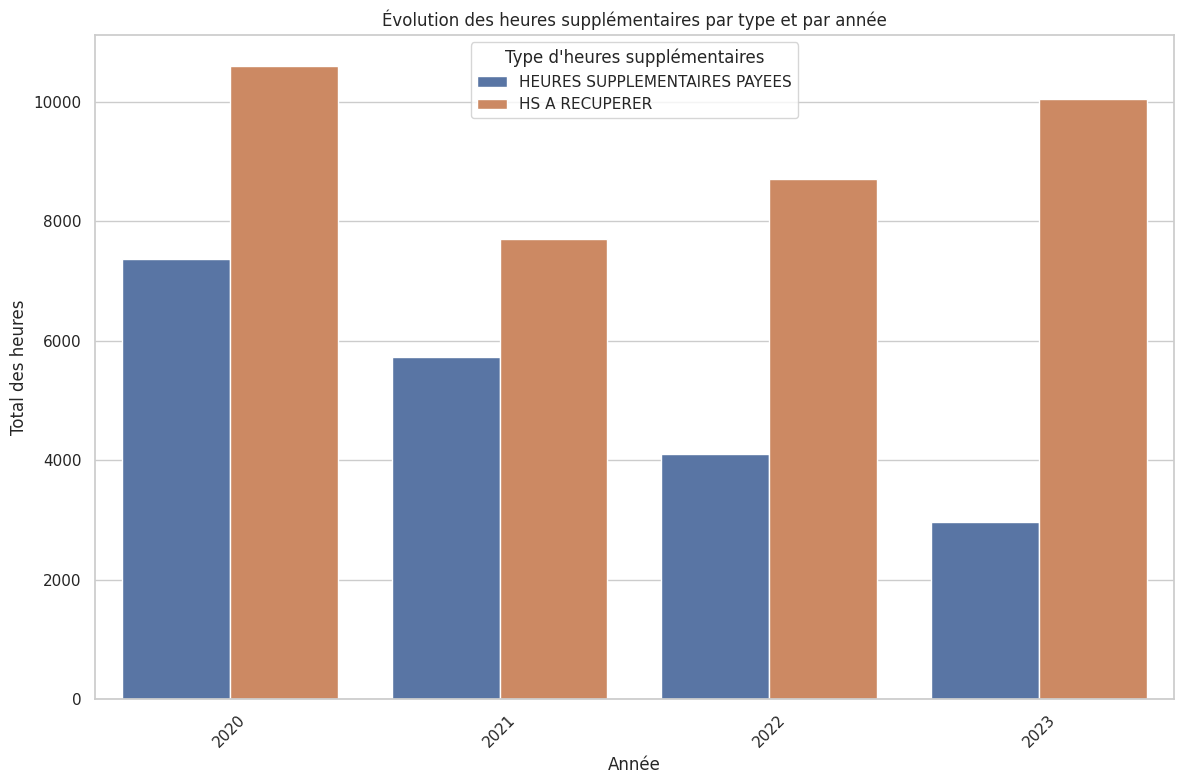

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer la figure pour les heures supplémentaires
plt.figure(figsize=(12, 8))

# Graphique en barres empilées pour les heures supplémentaires
sns.barplot(x='Année', y='Total Heures', hue='Intitulé', data=resultats_heures_supp, estimator=sum)

plt.title('Évolution des heures supplémentaires par type et par année')
plt.ylabel('Total des heures')
plt.xlabel('Année')
plt.xticks(rotation=45)
plt.legend(title='Type d\'heures supplémentaires')
plt.tight_layout()
plt.show()


In [45]:
# Regrouper les données par 'Qualification' et 'Intitulé' (type d'heures supplémentaires)
resultats_par_qualification = df_concatene[df_concatene['Intitulé'].isin(['HEURES SUPPLEMENTAIRES PAYEES', 'HS A RECUPERER'])] \
    .groupby(['Qualification', 'Intitulé']).agg({
        'Heure(s)': ['sum', 'mean', 'min', 'max'],
        'Matricule': 'nunique'  # Nombre unique de personnes (matricule) concernées
    }).reset_index()

# Renommer les colonnes pour plus de clarté
resultats_par_qualification.columns = ['Qualification', 'Intitulé', 'Total Heures', 'Heures Moyennes', 'Heures Min', 'Heures Max', 'Nombre de Personnes']

# Trier les résultats par total des heures pour voir les qualifications les plus concernées
resultats_par_qualification = resultats_par_qualification.sort_values(by='Total Heures', ascending=False)

# Afficher les 10 qualifications avec le plus d'heures supplémentaires
print(resultats_par_qualification.head(10))


                    Qualification                       Intitulé  \
59                      INFIRMIER                 HS A RECUPERER   
58                      INFIRMIER  HEURES SUPPLEMENTAIRES PAYEES   
15                            ASH  HEURES SUPPLEMENTAIRES PAYEES   
14                  AIDE SOIGNANT                 HS A RECUPERER   
27                 CADRE DE SANTE                 HS A RECUPERER   
80       PREPARATEUR EN PHARMACIE                 HS A RECUPERER   
79       PREPARATEUR EN PHARMACIE  HEURES SUPPLEMENTAIRES PAYEES   
92      TECHNICIEN DE LABORATOIRE  HEURES SUPPLEMENTAIRES PAYEES   
90  SECRETAIRE DE SERVICE MEDICAL                 HS A RECUPERER   
55                           IADE                 HS A RECUPERER   

    Total Heures  Heures Moyennes  Heures Min  Heures Max  Nombre de Personnes  
59      16429.16         1.505329        0.00       27.00                  782  
58       4761.50         1.576656        0.00       18.00                  282  
15      

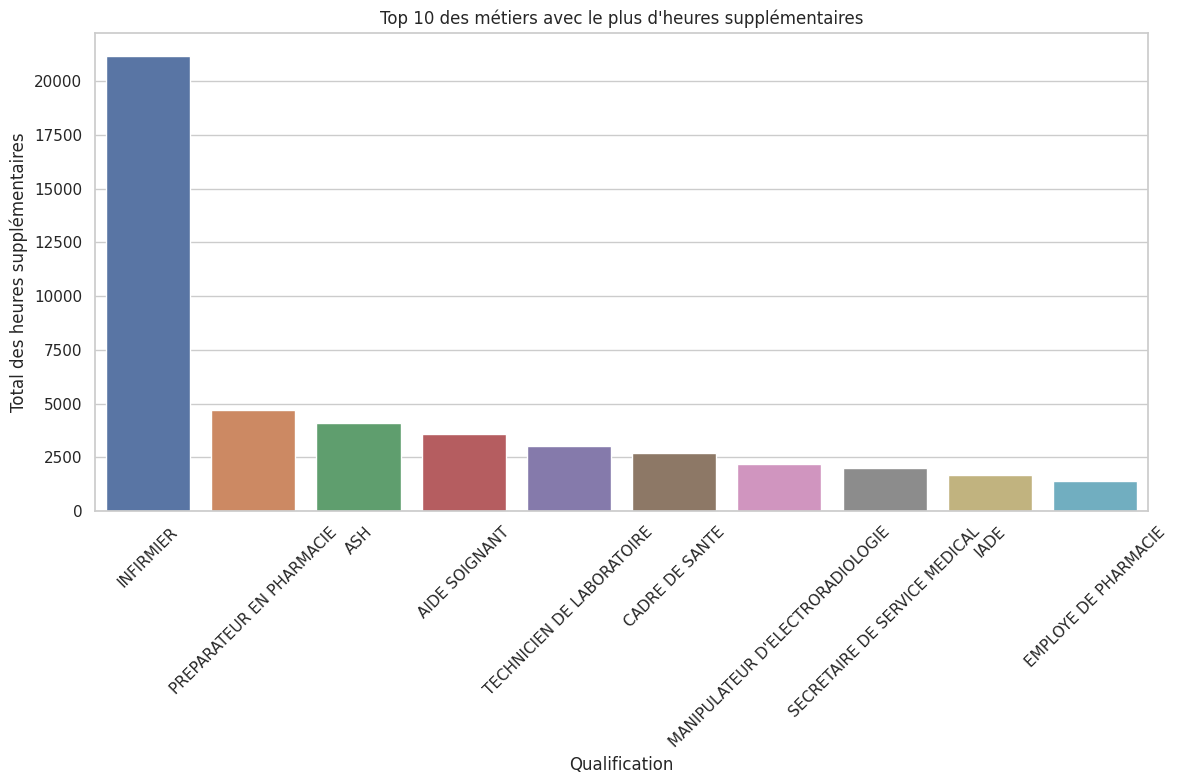

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les résultats pour les 10 premières qualifications les plus concernées
top_qualifications = resultats_par_qualification.groupby('Qualification').agg({'Total Heures': 'sum'}).sort_values(by='Total Heures', ascending=False).head(10)

# Créer un graphique
plt.figure(figsize=(12, 8))
sns.barplot(x=top_qualifications.index, y=top_qualifications['Total Heures'])
plt.title('Top 10 des métiers avec le plus d\'heures supplémentaires')
plt.ylabel('Total des heures supplémentaires')
plt.xlabel('Qualification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
# Regrouper les données par 'Année', 'Qualification' et 'Intitulé'
tendances_par_qualification = df_concatene[df_concatene['Intitulé'].isin(['HEURES SUPPLEMENTAIRES PAYEES', 'HS A RECUPERER'])] \
    .groupby(['Année', 'Qualification', 'Intitulé']).agg({
        'Heure(s)': 'sum',  # Total des heures pour chaque qualification et chaque année
    }).reset_index()

# Renommer la colonne pour plus de clarté
tendances_par_qualification.columns = ['Année', 'Qualification', 'Intitulé', 'Total Heures']

# Afficher un aperçu des données
print(tendances_par_qualification.head(10))


   Année          Qualification                       Intitulé  Total Heures
0   2020       ADJOINT DE SOINS  HEURES SUPPLEMENTAIRES PAYEES         15.00
1   2020       ADJOINT DE SOINS                 HS A RECUPERER          1.00
2   2020           AGENT BUREAU  HEURES SUPPLEMENTAIRES PAYEES          7.00
3   2020           AGENT BUREAU                 HS A RECUPERER        145.25
4   2020        AIDE DE CUISINE  HEURES SUPPLEMENTAIRES PAYEES        239.00
5   2020     AIDE DE DIETETIQUE  HEURES SUPPLEMENTAIRES PAYEES        102.00
6   2020        AIDE LABORANTIN  HEURES SUPPLEMENTAIRES PAYEES          2.50
7   2020  AIDE MÉDICO-TECHNIQUE  HEURES SUPPLEMENTAIRES PAYEES         23.50
8   2020  AIDE MÉDICO-TECHNIQUE                 HS A RECUPERER         27.50
9   2020          AIDE SOIGNANT  HEURES SUPPLEMENTAIRES PAYEES         94.25


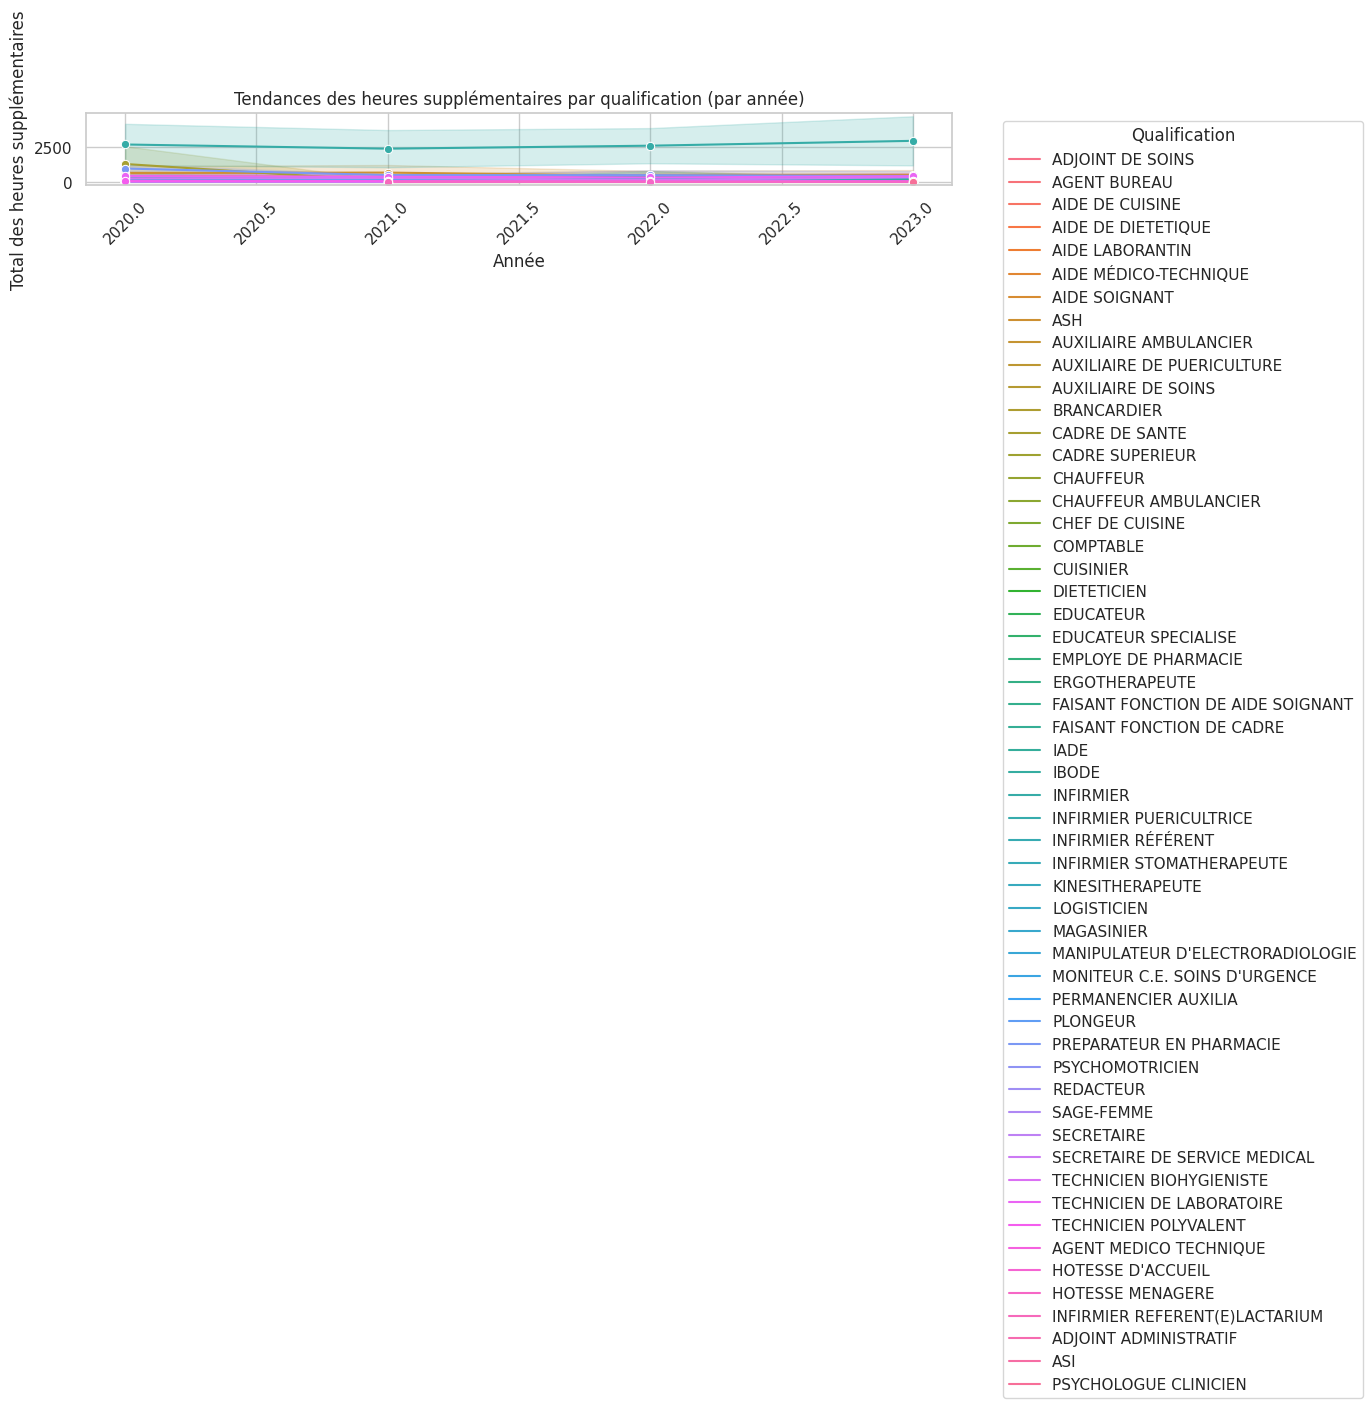

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres du graphique
plt.figure(figsize=(14, 8))

# Créer un graphique pour chaque qualification
sns.lineplot(data=tendances_par_qualification, x='Année', y='Total Heures', hue='Qualification', marker='o')

# Ajouter des titres et des labels
plt.title('Tendances des heures supplémentaires par qualification (par année)')
plt.ylabel('Total des heures supplémentaires')
plt.xlabel('Année')
plt.xticks(rotation=45)  # Rotation des étiquettes des années
plt.legend(title='Qualification', bbox_to_anchor=(1.05, 1), loc='upper left')  # Légende à l'extérieur du graphique

# Affichage du graphique
plt.tight_layout()
plt.show()


In [49]:
# Calcul de la variation en pourcentage d'une année à l'autre pour chaque qualification
tendances_par_qualification['Variation (%)'] = tendances_par_qualification.groupby('Qualification')['Total Heures'].pct_change() * 100

# Afficher un aperçu des données avec les variations
print(tendances_par_qualification.head(10))


   Année          Qualification                       Intitulé  Total Heures  \
0   2020       ADJOINT DE SOINS  HEURES SUPPLEMENTAIRES PAYEES         15.00   
1   2020       ADJOINT DE SOINS                 HS A RECUPERER          1.00   
2   2020           AGENT BUREAU  HEURES SUPPLEMENTAIRES PAYEES          7.00   
3   2020           AGENT BUREAU                 HS A RECUPERER        145.25   
4   2020        AIDE DE CUISINE  HEURES SUPPLEMENTAIRES PAYEES        239.00   
5   2020     AIDE DE DIETETIQUE  HEURES SUPPLEMENTAIRES PAYEES        102.00   
6   2020        AIDE LABORANTIN  HEURES SUPPLEMENTAIRES PAYEES          2.50   
7   2020  AIDE MÉDICO-TECHNIQUE  HEURES SUPPLEMENTAIRES PAYEES         23.50   
8   2020  AIDE MÉDICO-TECHNIQUE                 HS A RECUPERER         27.50   
9   2020          AIDE SOIGNANT  HEURES SUPPLEMENTAIRES PAYEES         94.25   

   Variation (%)  
0            NaN  
1     -93.333333  
2            NaN  
3    1975.000000  
4            NaN  
5    

In [50]:
# Filtrer les données pour ne garder que les heures supplémentaires
heures_sup = df_concatene[df_concatene['Intitulé'].isin(['HEURES SUPPLEMENTAIRES PAYEES', 'HS A RECUPERER'])]

# Regrouper par Matricule et calculer la somme des heures
heures_sup_par_agent = heures_sup.groupby(['Matricule', 'Salarié']).agg({
    'Heure(s)': 'sum'
}).reset_index()

# Renommer les colonnes pour plus de clarté
heures_sup_par_agent.columns = ['Matricule', 'Salarié', 'Total Heures Supplémentaires']

# Trier par Total Heures Supplémentaires pour obtenir les agents ayant fait le plus d'heures
heures_sup_par_agent = heures_sup_par_agent.sort_values(by='Total Heures Supplémentaires', ascending=False)

# Afficher les agents avec le plus d'heures supplémentaires
print(heures_sup_par_agent.head(10))


     Matricule                    Salarié  Total Heures Supplémentaires
1056  20170071            TEURURAI MOEANI                       1035.25
1115  20170376         GENDRON CHRISTOPHE                        844.25
60    19890005             BADIN RODOLPHE                        813.00
1341  20190347      TEHETIA MILANA,AHUURA                        681.50
921   20150089  HAOATAI BERNADETTE,MAHERA                        538.50
539   20080121            PROTAR ISABELLE                        514.25
667   20110077              BREDIN MANAVA                        468.00
494   20070156           NIVA MANUA,STEVE                        447.00
1268  20190113             GARREAU YESICA                        444.00
158   19940101        GOULETTE CHRISTELLE                        424.75


In [51]:
# Filtrer les données pour ne garder que les heures supplémentaires
heures_sup = df_concatene[df_concatene['Intitulé'].isin(['HEURES SUPPLEMENTAIRES PAYEES', 'HS A RECUPERER'])]

# Regrouper par Matricule, Salarié et Année, puis calculer la somme des heures pour chaque agent par année
heures_sup_par_agent_annee = heures_sup.groupby(['Matricule', 'Salarié', 'Année']).agg({
    'Heure(s)': 'sum'
}).reset_index()

# Renommer les colonnes pour plus de clarté
heures_sup_par_agent_annee.columns = ['Matricule', 'Salarié', 'Année', 'Total Heures Supplémentaires']

# Trier par Matricule, puis Année
heures_sup_par_agent_annee = heures_sup_par_agent_annee.sort_values(by=['Matricule', 'Année'])

# Afficher un aperçu des données
print(heures_sup_par_agent_annee.head(10))


  Matricule                  Salarié  Année  Total Heures Supplémentaires
0  19800019  HANOUX MARIE-BERNADETTE   2020                         10.50
1  19800019  HANOUX MARIE-BERNADETTE   2021                          9.50
2  19800019  HANOUX MARIE-BERNADETTE   2022                          2.00
3  19800019  HANOUX MARIE-BERNADETTE   2023                          5.50
4  19820011  HURI ARIIOEHAU PHILIPPE   2020                         27.75
5  19820011  HURI ARIIOEHAU PHILIPPE   2021                         30.50
6  19820011  HURI ARIIOEHAU PHILIPPE   2022                         30.00
7  19820011  HURI ARIIOEHAU PHILIPPE   2023                         24.50
8  19820017               TSU ANGELE   2022                          3.50
9  19820017               TSU ANGELE   2023                          3.50


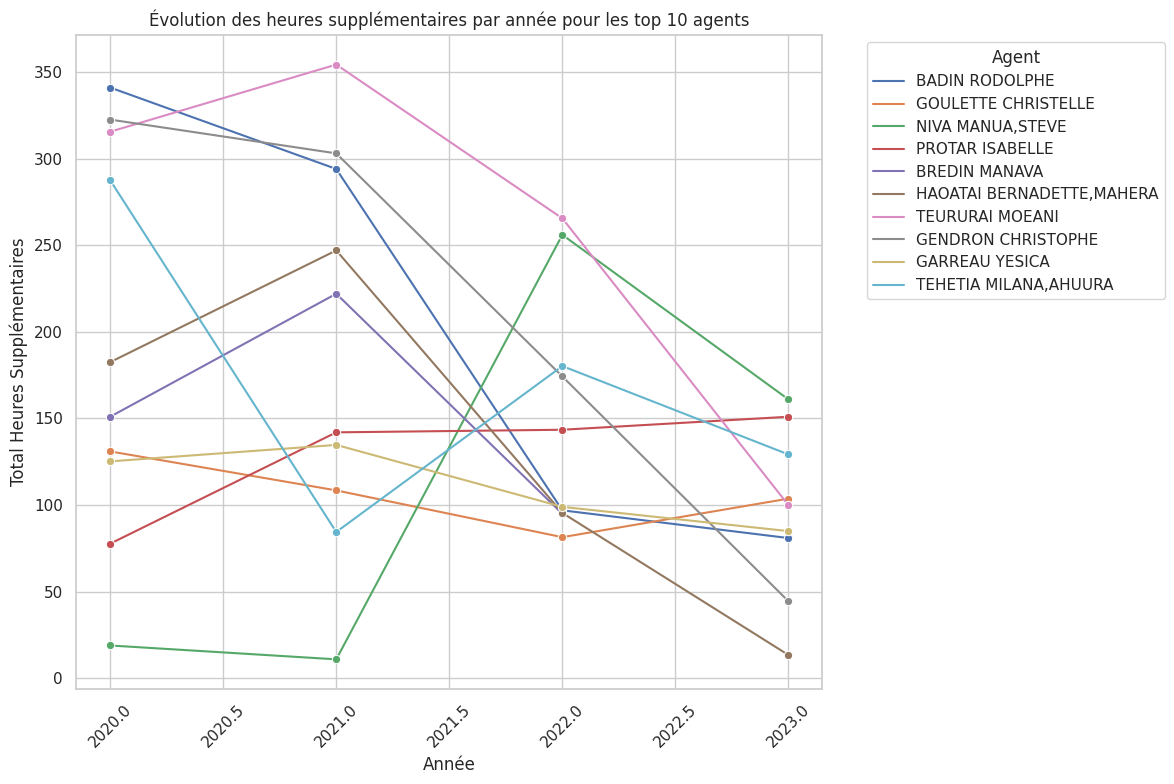

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les top 10 agents ayant fait le plus d'heures supplémentaires
top_10_agents_matricules = ['20170071', '20170376', '19890005', '20190347', '20150089',
                            '20080121', '20110077', '20070156', '20190113', '19940101']
heures_sup_top_10 = heures_sup_par_agent_annee[heures_sup_par_agent_annee['Matricule'].isin(top_10_agents_matricules)]

# Tracer l'évolution des heures supplémentaires par agent par année
plt.figure(figsize=(12, 8))
sns.lineplot(data=heures_sup_top_10, x='Année', y='Total Heures Supplémentaires', hue='Salarié', marker='o')

# Ajouter des titres et des labels
plt.title('Évolution des heures supplémentaires par année pour les top 10 agents')
plt.xlabel('Année')
plt.ylabel('Total Heures Supplémentaires')
plt.xticks(rotation=45)  # Tourner les étiquettes des années pour plus de lisibilité
plt.legend(title='Agent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Affichage du graphique
plt.show()


In [53]:
# Afficher les valeurs uniques dans la colonne 'Intitulé'
valeurs_intitule = df_concatene['Intitulé'].unique()

print("Valeurs uniques dans la colonne 'Intitulé' :")
print(valeurs_intitule)


Valeurs uniques dans la colonne 'Intitulé' :
['HEURES SUPPLEMENTAIRES PAYEES' 'INTERVENTION SUR ASTREINTE PAYEE'
 'HS A RECUPERER' 'MALADIE' 'ANNUEL' 'RECUPERATION'
 'FORMATION A RECUPERER' 'EXCEPTIONNEL'
 'INTERVENTION SUR ASTREINTE RECUPEREE' 'ENFANT' 'DECES FAMILIAL'
 'FORMATION' 'ALLAITEMENT' 'ANCIENNETE' 'EXCEPTIONNEL DE FORMATION'
 'Hors Saison (CEAPF)' 'ACCIDENT DU TRAVAIL' 'MATERNITE'
 'ABSENCE A JUSTIFIER' 'TOURNEE' 'MARIAGE FAMILIAL' 'PATERNEL'
 'SERVICE NON FAIT' 'ABS SYNDICALES FORMATION'
 'ABS MANDAT MUNICIPAL (Article L2123-1)' 'MARIAGE'
 'Activ. Jeunesse & Sports' 'DELAI DE ROUTE ' 'TRAINING BREAK' 'BAPTEME'
 'GREVE' 'ADOPTION' 'QUATORZAINE COVID 19' 'ADMINISTRATIF' 'AEA - COVID'
 'MISSION' 'GREVE-ABSENCE A JUSTIFIER' 'DECES DU CONJOINT' 'DECES ENFANT'
 'FORMATION Non Récupérée / Non Rémunérée'
 'Réunion des Organismes Consultatifs à récupérer']


In [54]:
# Afficher les valeurs uniques dans la colonne 'Intitulé'
valeurs_intitule = df_concatene['Intitulé'].unique()

print("Valeurs uniques dans la colonne 'Intitulé' :")
print(valeurs_intitule)


Valeurs uniques dans la colonne 'Intitulé' :
['HEURES SUPPLEMENTAIRES PAYEES' 'INTERVENTION SUR ASTREINTE PAYEE'
 'HS A RECUPERER' 'MALADIE' 'ANNUEL' 'RECUPERATION'
 'FORMATION A RECUPERER' 'EXCEPTIONNEL'
 'INTERVENTION SUR ASTREINTE RECUPEREE' 'ENFANT' 'DECES FAMILIAL'
 'FORMATION' 'ALLAITEMENT' 'ANCIENNETE' 'EXCEPTIONNEL DE FORMATION'
 'Hors Saison (CEAPF)' 'ACCIDENT DU TRAVAIL' 'MATERNITE'
 'ABSENCE A JUSTIFIER' 'TOURNEE' 'MARIAGE FAMILIAL' 'PATERNEL'
 'SERVICE NON FAIT' 'ABS SYNDICALES FORMATION'
 'ABS MANDAT MUNICIPAL (Article L2123-1)' 'MARIAGE'
 'Activ. Jeunesse & Sports' 'DELAI DE ROUTE ' 'TRAINING BREAK' 'BAPTEME'
 'GREVE' 'ADOPTION' 'QUATORZAINE COVID 19' 'ADMINISTRATIF' 'AEA - COVID'
 'MISSION' 'GREVE-ABSENCE A JUSTIFIER' 'DECES DU CONJOINT' 'DECES ENFANT'
 'FORMATION Non Récupérée / Non Rémunérée'
 'Réunion des Organismes Consultatifs à récupérer']


In [55]:
import pandas as pd

# On s'assure que les colonnes 'Début' et 'Fin' sont de type datetime
df_concatene['Début'] = pd.to_datetime(df_concatene['Début'])
df_concatene['Fin'] = pd.to_datetime(df_concatene['Fin'])

# Calcul de la durée en heures pour chaque jour
df_concatene['Durée en heures'] = (df_concatene['Fin'] - df_concatene['Début']).dt.total_seconds() / 3600


In [56]:
# Ajouter une colonne pour l'année et la semaine (numéro ISO de la semaine)
df_concatene['Semaine'] = df_concatene['Début'].dt.isocalendar().week
df_concatene['Année'] = df_concatene['Début'].dt.year

# Calculer les heures hebdomadaires par agent
heures_par_semaine = df_concatene.groupby(['Matricule', 'Année', 'Semaine']).agg({
    'Durée en heures': 'sum'
}).reset_index()

# Identifier les heures supplémentaires structurelles (au-delà de 39h par semaine)
heures_par_semaine['Heures supplémentaires structurelles'] = heures_par_semaine['Durée en heures'].apply(lambda x: max(0, x - 39))


In [57]:
# Aggrégation des heures supplémentaires par agent et année
heures_supp_par_agent = heures_par_semaine.groupby(['Matricule', 'Année']).agg({
    'Heures supplémentaires structurelles': 'sum'
}).reset_index()

# Optionnel: trier par les agents ayant fait le plus d'heures supplémentaires structurelles
heures_supp_par_agent = heures_supp_par_agent.sort_values(by='Heures supplémentaires structurelles', ascending=False)

# Afficher les résultats
print(heures_supp_par_agent.head(10))


     Matricule  Année  Heures supplémentaires structurelles
1223  20010008   2020                                8028.0
4187  20160249   2020                                8028.0
947   19980150   2023                                8004.0
825   19960051   2023                                8004.0
431   19910022   2023                                8004.0
814   19960017   2023                                8004.0
613   19930044   2021                                8004.0
4190  20160249   2023                                8004.0
1908  20050262   2023                                8004.0
3305  20130061   2021                                8004.0


In [58]:
# Définir les intitulés qui ajoutent ou retirent du temps de présence
intitules_ajoutent = [
    'HEURES SUPPLEMENTAIRES PAYEES', 'INTERVENTION SUR ASTREINTE PAYEE', 
    'HS A RECUPERER', 'FORMATION A RECUPERER', 'INTERVENTION SUR ASTREINTE RECUPEREE'
]

intitules_retirent = [
    'MALADIE', 'ANNUEL', 'RECUPERATION', 'ENFANT', 'DECES FAMILIAL', 
    'ALLAITEMENT', 'ACCIDENT DU TRAVAIL', 'MATERNITE', 'ABSENCE A JUSTIFIER', 
    'PATERNEL', 'GREVE', 'ADOPTION', 'QUATORZAINE COVID 19', 'SERVICE NON FAIT', 
    'FORMATION Non Récupérée / Non Rémunérée'
]

# Fonction pour ajuster les heures en fonction de l'intitulé
def ajuster_heures(row):
    if row['Intitulé'] in intitules_ajoutent:
        return row['Heure(s)']  # On ajoute le temps
    elif row['Intitulé'] in intitules_retirent:
        return -row['Heure(s)']  # On retire le temps
    else:
        return 0  # Aucun impact sur le temps de présence

# Appliquer l'ajustement des heur


In [59]:
# Calculer les heures totales et moyennes par agent
heures_par_agent = df_concatene.groupby(['Matricule', 'Salarié']).agg({
    'Heures ajustées': ['sum', 'mean']
}).reset_index()

# Renommer les colonnes pour plus de clarté
heures_par_agent.columns = ['Matricule', 'Salarié', 'Total Heures ajustées', 'Heures Moyennes ajustées']

# Afficher les résultats
print(heures_par_agent.head(10))


KeyError: "Column(s) ['Heures ajustées'] do not exist"

In [60]:
# Calculer les heures totales et moyennes par agent
heures_par_agent = df_concatene.groupby(['Matricule', 'Salarié']).agg({
    'Heures ajustées': ['sum', 'mean']
}).reset_index()

# Renommer les colonnes pour plus de clarté
heures_par_agent.columns = ['Matricule', 'Salarié', 'Total Heures ajustées', 'Heures Moyennes ajustées']

# Afficher les résultats
print(heures_par_agent.head(10))


KeyError: "Column(s) ['Heures ajustées'] do not exist"

In [61]:
# Ajouter une colonne pour l'année
df_concatene['Année'] = df_concatene['Début'].dt.year

# Calculer les heures ajustées moyennes par agent et par année
heures_par_agent_annee = df_concatene.groupby(['Matricule', 'Salarié', 'Année']).agg({
    'Heures ajustées': ['sum', 'mean']
}).reset_index()

# Renommer les colonnes pour plus de clarté
heures_par_agent_annee.columns = ['Matricule', 'Salarié', 'Année', 'Total Heures ajustées', 'Heures Moyennes ajustées']

# Afficher les résultats
print(heures_par_agent_annee.head(10))


KeyError: "Column(s) ['Heures ajustées'] do not exist"